# Importing required libraries

In [1]:
import pandas as pd

In [2]:
import plotly.figure_factory as ff
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True) #seaborn theme colour variations 

In [3]:
#Loading data into data frame
wh=pd.read_csv('WHO COVID-19 global table data February 2021.csv')

In [4]:
# Displaying the first 5 rows of the dataset
wh.head(5)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,103989900,13321.26077,3464227,464613,2260259,289.542538,91957,13004,NaN
1,United States of America,Americas,26172274,79069.68000,973433,116762,443256,1339.130000,21686,3426,Community transmission
2,India,South-East Asia,10790183,7818.95000,88990,12899,154703,112.100000,856,107,Clusters of cases
3,Brazil,Americas,9283418,43674.46000,350062,54096,226309,1064.690000,7431,1210,Community transmission
4,Russian Federation,Europe,3917918,26847.11000,124108,16714,75205,515.330000,3554,521,Clusters of cases


In [5]:
# Droping irrelevant colunms from the dataset
wh=wh.drop(['Transmission Classification', 'Cases - newly reported in last 7 days', 'Cases - newly reported in last 24 hours', 'Deaths - newly reported in last 7 days', 'Deaths - newly reported in last 24 hours', 'Cases - cumulative total per 1 million population', 'Deaths - cumulative total per 1 million population'], axis=1)

In [6]:
# Displaying the first 5 rows of the dataset
wh.head(5)

,Name,WHO Region,Cases - cumulative total,Deaths - cumulative total
0,Global,NaN,103989900,2260259
1,United States of America,Americas,26172274,443256
2,India,South-East Asia,10790183,154703
3,Brazil,Americas,9283418,226309
4,Russian Federation,Europe,3917918,75205


In [7]:
# Displaying the last 5 rows of the dataset
wh.tail(5)

,Name,WHO Region,Cases - cumulative total,Deaths - cumulative total
232,Saint Helena,Africa,0,0
233,Tokelau,Western Pacific,0,0
234,Tonga,Western Pacific,0,0
235,Turkmenistan,Europe,0,0
236,Tuvalu,Western Pacific,0,0


In [8]:
#Checking data types
wh.dtypes

Name                         object
WHO Region                   object
Cases - cumulative total      int64
Deaths - cumulative total     int64
dtype: object

In [9]:
#Checking for the number of rows and columns 
wh.shape

(237, 4)

In [10]:
duplicate_rows_wh= wh[wh.duplicated()] #checking for duplicate rows
print ("number of duplicate rows:", duplicate_rows_wh.shape) #display all duplicated rows

number of duplicate rows: (0, 4)


In [11]:
#count of the number of rows
wh.count()

Name                         237
WHO Region                   236
Cases - cumulative total     237
Deaths - cumulative total    237
dtype: int64

In [12]:
#Checking for null values
print (wh.isnull ().sum())

Name                         0
WHO Region                   1
Cases - cumulative total     0
Deaths - cumulative total    0
dtype: int64


Outliers

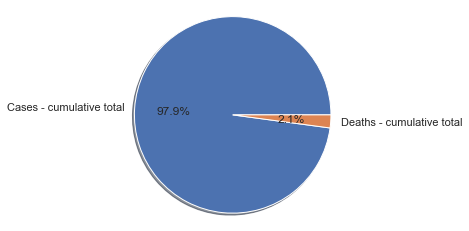

In [15]:
# Total global number of covid cases against total death cases across six regions
labels = ['Cases - cumulative total', 'Deaths - cumulative total']
sizes = [wh.loc[0,'Cases - cumulative total'],
         wh.loc[0,'Deaths - cumulative total'],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

C:\Users\bimbo\Anaconda3\envs\Eda Project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


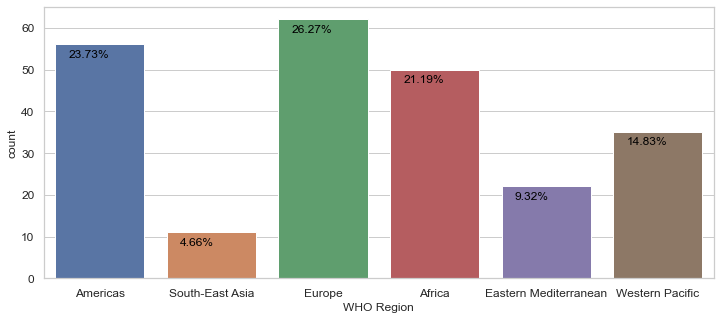

In [37]:
plt.figure(figsize =(12,5))
ax = sns.countplot('WHO Region', data = wh)
plt.xticks(size = 12)
plt.xlabel('WHO Region', size =12)
plt.yticks(size = 12)
plt.ylabel('count', size =12)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='black')

Horizontal bar chart

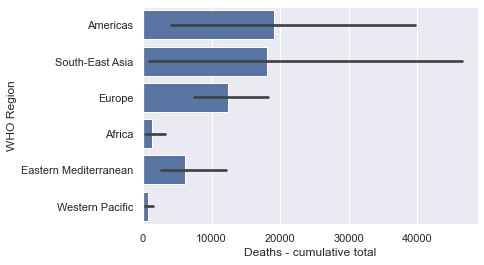

<Figure size 1152x5400 with 0 Axes>

In [16]:
#Total number of death caused by covid across regions
sns.barplot(x = 'Deaths - cumulative total', y = 'WHO Region', data = wh,
            label = 'WHO Region by Death cases', color = 'b', edgecolor = 'w')
plt.figure(figsize=(16, 75))
sns.despine(left = True, bottom = True)
plt.show()


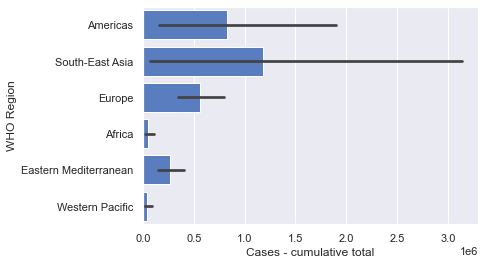

<Figure size 1152x5400 with 0 Axes>

In [22]:
#Total number of covid cases across regions
#horizontal bar chart
sns.barplot(x = 'Cases - cumulative total', y = 'WHO Region', data = wh,
            label = 'WHO Region by covid cases', color = 'b', edgecolor = 'w')
plt.figure(figsize=(16, 75))
sns.despine(left = True, bottom = True)
plt.show()

In [20]:
wh.head(10)

,Name,WHO Region,Cases - cumulative total,Deaths - cumulative total
0,Global,NaN,103989900,2260259
1,United States of America,Americas,26172274,443256
2,India,South-East Asia,10790183,154703
3,Brazil,Americas,9283418,226309
4,Russian Federation,Europe,3917918,75205
5,The United Kingdom,Europe,3871829,109335
6,France,Europe,3198030,77193
7,Spain,Europe,2883465,60370
8,Italy,Europe,2583790,89820
9,Turkey,Europe,2501079,26354
